<a href="https://colab.research.google.com/github/danielleitesoares/tccuea/blob/main/Amazonia_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>Universidade do Estado do Amazonas</center>
##### <center>Pós-graduação Lato Sensu em Ciência de Dados</center>
##### <center>Fundamentos de Machine Learning Aplicado II (Turma 02)</center>

<center>

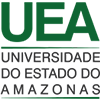

</center>

---

## <center>Código fonte do TCC</center>
##### <center>**Professora:** Msc. Alice Adativa</center>
###### <center>**Aluno:** Daniel Erasmo Leite Soares</center>



---



## Preparação do Ambiente

---



In [1]:
# Pacotes instalados
!pip install geopandas
!pip install contextily
!pip install biokit
!pip install plotly

     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 16.7 MB 253 kB/s 
     |████████████████████████████████| 6.3 MB 15.0 MB/s 
     |████████████████████████████████| 19.3 MB 62.2 MB/s 
     |████████████████████████████████| 162 kB 5.1 MB/s 
     |████████████████████████████████| 47 kB 3.8 MB/s 
     |████████████████████████████████| 1.0 MB 54.4 MB/s 
     |████████████████████████████████| 2.3 MB 37.5 MB/s 
     |████████████████████████████████| 51 kB 216 kB/s 
     |████████████████████████████████| 47 kB 4.1 MB/s 
     |████████████████████████████████| 144 kB 67.4 MB/s 
     |████████████████████████████████| 5.8 MB 48.8 MB/s 
     |████████████████████████████████| 251 kB 56.1 MB/s 
     |████████████████████████████████| 127 kB 47.1 MB/s 
  Created wheel for biokit: filename=biokit-0.5.0-py3-none-any.whl size=177148 sha256=256ccefd18aeb6e2358a73bcb400782b66d73f6c6de6e60e31d38374834fdc40
  Stored in directory: /root/.cache/pip/whee

In [2]:
## Bibliotecas de Tratamento de Dados
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import contextily
import numpy as np

## Bibliotecas Gráficas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go

## Bibliotecas de ML
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
#from sklearn.cluster import MeanShift
#from sklearn.cluster import estimate_bandwidth

## Carregamento e preparação do DataFrame de todos os Biomas

---



In [3]:
# Montando a pasta do Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Criando os DataFrames de focos de queimadas do Brasil
# Onde 
#alertas_2019 = pd.read_csv('/content/drive/MyDrive/TCC/dataset/Focos_2019-01-01_2019-12-31.csv')
#alertas_2020 = pd.read_csv('/content/drive/MyDrive/TCC/dataset/Focos_2020-01-01_2020-12-31.csv')
alertas_2021 = pd.read_csv('/content/drive/MyDrive/TCC/dataset/Focos_2021-01-01_2021-12-31.csv')
#alertas = [alertas_2019, alertas_2020, alertas_2021]
#alertas_1921 = pd.concat(alertas)
alertas_1921 = alertas_2021


In [5]:
alertas_1921

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2021/08/29 18:45:00,AQUA_M-T,Brasil,ACRE,MANOEL URBANO,Amazonia,2.0,0.4,0.8,-8.76391,-69.54569,39.0
1,2021/08/29 18:45:00,AQUA_M-T,Brasil,ACRE,TARAUACA,Amazonia,0.0,0.0,0.2,-8.11110,-71.35509,17.3
2,2021/08/29 18:45:00,AQUA_M-T,Brasil,AMAZONAS,LABREA,Amazonia,7.0,3.3,0.5,-8.73096,-66.67579,136.9
3,2021/08/29 18:45:00,AQUA_M-T,Brasil,AMAZONAS,LABREA,Amazonia,7.0,2.8,0.5,-8.72563,-66.64363,123.3
4,2021/08/29 18:45:00,AQUA_M-T,Brasil,ACRE,TARAUACA,Amazonia,0.0,0.0,0.2,-8.10842,-71.34766,18.5
...,...,...,...,...,...,...,...,...,...,...,...,...
184076,2021/08/29 17:05:00,AQUA_M-T,Brasil,TOCANTINS,LAGOA DA CONFUSAO,Cerrado,88.0,0.0,1.0,-10.87773,-50.33506,246.6
184077,2021/08/29 17:05:00,AQUA_M-T,Brasil,MATO GROSSO,NOVO SANTO ANTONIO,Cerrado,104.0,0.0,1.0,-12.37030,-51.13305,10.4
184078,2021/08/29 17:05:00,AQUA_M-T,Brasil,MATO GROSSO,NOVO SANTO ANTONIO,Cerrado,103.0,0.0,1.0,-12.34445,-51.14636,150.6
184079,2021/08/29 17:07:00,AQUA_M-T,Brasil,PARA,PACAJA,Amazonia,2.0,0.0,0.5,-4.08141,-50.88046,19.3


## Carregamento e preparação do DataFrame somente do Bioma Amazônia

---



In [6]:
alertas_amazonia = alertas_1921[alertas_1921['bioma'] == 'Amazonia']

In [7]:
alertas_amazonia

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2021/08/29 18:45:00,AQUA_M-T,Brasil,ACRE,MANOEL URBANO,Amazonia,2.0,0.4,0.8,-8.76391,-69.54569,39.0
1,2021/08/29 18:45:00,AQUA_M-T,Brasil,ACRE,TARAUACA,Amazonia,0.0,0.0,0.2,-8.11110,-71.35509,17.3
2,2021/08/29 18:45:00,AQUA_M-T,Brasil,AMAZONAS,LABREA,Amazonia,7.0,3.3,0.5,-8.73096,-66.67579,136.9
3,2021/08/29 18:45:00,AQUA_M-T,Brasil,AMAZONAS,LABREA,Amazonia,7.0,2.8,0.5,-8.72563,-66.64363,123.3
4,2021/08/29 18:45:00,AQUA_M-T,Brasil,ACRE,TARAUACA,Amazonia,0.0,0.0,0.2,-8.10842,-71.34766,18.5
...,...,...,...,...,...,...,...,...,...,...,...,...
184063,2021/08/29 18:45:00,AQUA_M-T,Brasil,AMAZONAS,BOCA DO ACRE,Amazonia,10.0,0.0,1.0,-9.15154,-68.21212,82.2
184064,2021/08/29 18:45:00,AQUA_M-T,Brasil,ACRE,FEIJO,Amazonia,0.0,0.0,0.4,-8.95060,-70.55329,58.9
184072,2021/08/29 17:05:00,AQUA_M-T,Brasil,MATO GROSSO,SAO FELIX DO ARAGUAIA,Amazonia,97.0,0.0,1.0,-11.26925,-52.74310,37.1
184075,2021/08/29 17:05:00,AQUA_M-T,Brasil,MATO GROSSO,SAO FELIX DO ARAGUAIA,Amazonia,105.0,0.0,1.0,-11.22230,-52.71341,47.5


## Preparação do DataFrame de todos os Biomas

---



In [8]:
geometry = [Point(xy) for xy in zip(alertas_amazonia['longitude'], alertas_amazonia['latitude'])]

In [9]:
alertas_amazonia = gpd.GeoDataFrame(alertas_amazonia, crs='EPSG:4326', geometry=geometry)

In [10]:
type(alertas_amazonia)

geopandas.geodataframe.GeoDataFrame

In [11]:
alertas_amazonia

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,geometry
0,2021/08/29 18:45:00,AQUA_M-T,Brasil,ACRE,MANOEL URBANO,Amazonia,2.0,0.4,0.8,-8.76391,-69.54569,39.0,POINT (-69.54569 -8.76391)
1,2021/08/29 18:45:00,AQUA_M-T,Brasil,ACRE,TARAUACA,Amazonia,0.0,0.0,0.2,-8.11110,-71.35509,17.3,POINT (-71.35509 -8.11110)
2,2021/08/29 18:45:00,AQUA_M-T,Brasil,AMAZONAS,LABREA,Amazonia,7.0,3.3,0.5,-8.73096,-66.67579,136.9,POINT (-66.67579 -8.73096)
3,2021/08/29 18:45:00,AQUA_M-T,Brasil,AMAZONAS,LABREA,Amazonia,7.0,2.8,0.5,-8.72563,-66.64363,123.3,POINT (-66.64363 -8.72563)
4,2021/08/29 18:45:00,AQUA_M-T,Brasil,ACRE,TARAUACA,Amazonia,0.0,0.0,0.2,-8.10842,-71.34766,18.5,POINT (-71.34766 -8.10842)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
184063,2021/08/29 18:45:00,AQUA_M-T,Brasil,AMAZONAS,BOCA DO ACRE,Amazonia,10.0,0.0,1.0,-9.15154,-68.21212,82.2,POINT (-68.21212 -9.15154)
184064,2021/08/29 18:45:00,AQUA_M-T,Brasil,ACRE,FEIJO,Amazonia,0.0,0.0,0.4,-8.95060,-70.55329,58.9,POINT (-70.55329 -8.95060)
184072,2021/08/29 17:05:00,AQUA_M-T,Brasil,MATO GROSSO,SAO FELIX DO ARAGUAIA,Amazonia,97.0,0.0,1.0,-11.26925,-52.74310,37.1,POINT (-52.74310 -11.26925)
184075,2021/08/29 17:05:00,AQUA_M-T,Brasil,MATO GROSSO,SAO FELIX DO ARAGUAIA,Amazonia,105.0,0.0,1.0,-11.22230,-52.71341,47.5,POINT (-52.71341 -11.22230)


In [12]:
alertas_amazonia = alertas_amazonia.to_crs(crs='EPSG:3857')

In [13]:
alertas_amazonia.crs.to_string()

'EPSG:3857'

In [14]:
alertas_amazonia['estado'].unique()

array(['ACRE', 'AMAZONAS', 'PARA', 'MATO GROSSO', 'RONDONIA', 'MARANHAO',
       'TOCANTINS', 'AMAPA', 'RORAIMA'], dtype=object)

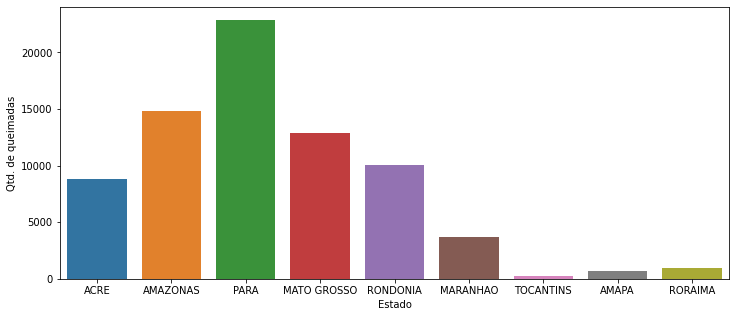

In [15]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='estado', data=alertas_amazonia)
ax.set_xlabel('Estado')
ax.set_ylabel('Qtd. de queimadas')
plt.show()

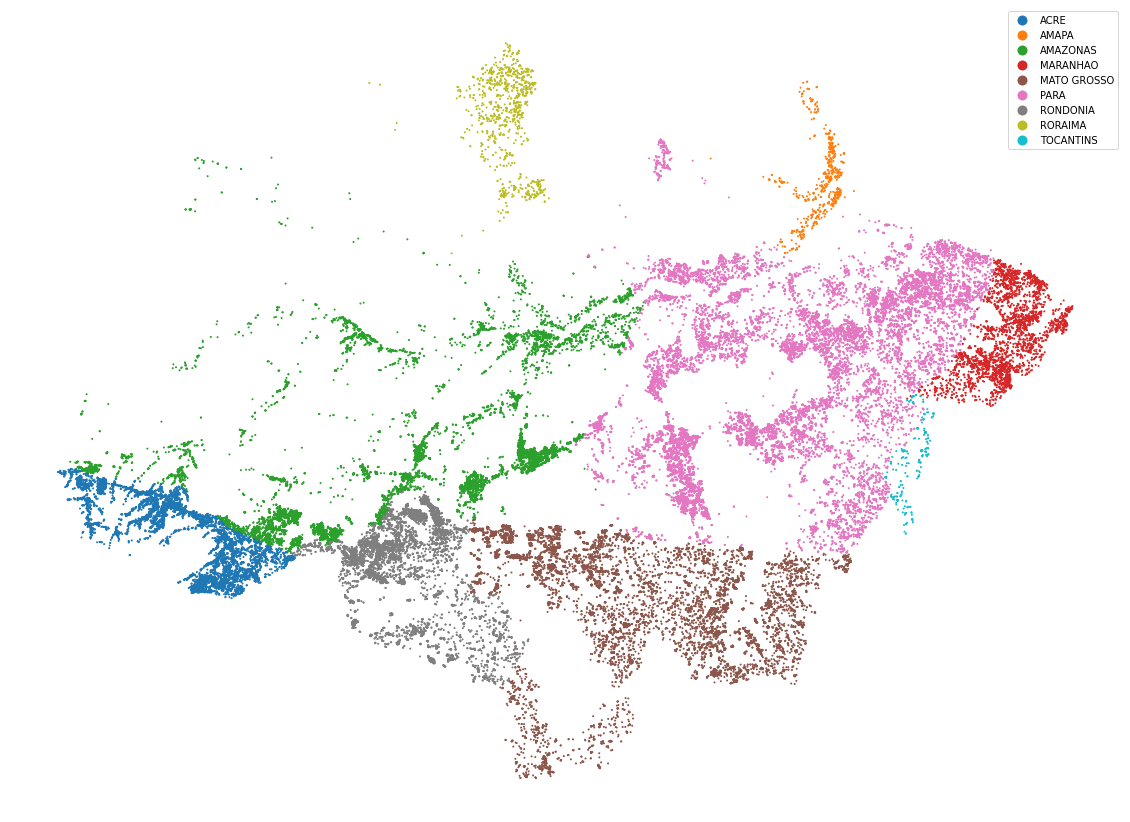

In [16]:
ax = alertas_amazonia.plot(figsize=(20, 15), column='estado', markersize=1, legend=True)
#contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()

## **Aplicação dos Algoritmos para os Biomas**

*   DBSCAN

**K-Means Para o Bioma Amazônia**

In [17]:
coord_amazonia = alertas_amazonia.drop(columns=["datahora","satelite","pais","estado","municipio","bioma","diasemchuva","precipitacao","riscofogo","frp","geometry"])
#coord_biomas = alertas_1921.drop(columns=["datahora","satelite","pais","estado","municipio","diasemchuva","precipitacao","riscofogo","frp","geometry"])

**DBSCAN para o Bioma Amazônia**

In [116]:
#agrupadorDB = DBSCAN(eps = 1.31, min_samples = 15, metric='manhattan')
agrupadorDB = DBSCAN(eps = 0.8, min_samples = 3, metric='manhattan')
agrupadorDB.fit(coord_amazonia)
np.unique(agrupadorDB.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7])

In [ ]:
#np.unique(agrupadorDB.labels_)

In [118]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = coord_amazonia['latitude'], y = coord_amazonia['longitude'],
                         mode = 'markers',
                         marker = dict(color = agrupadorDB.labels_.astype(np.float)),
                         text = agrupadorDB.labels_))
#fig.show()


fig.update_layout(
    title_text="Highlight Clusters",
    showlegend=True,
)
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

